In [8]:
# Import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Set path
path = os.getcwd()
folder = 'Data DSA3101'
data_directory = os.path.join(path, folder)
os.chdir(data_directory)
print(data_directory)
print(os.getcwd())

c:\Users\inbam\Desktop\DSA3101-Project-main\Data DSA3101
c:\Users\inbam\Desktop\DSA3101-Project-main\Data DSA3101


In [3]:
# Load data
customer_data = pd.read_csv('customers.csv')

# Data cleaning and processing
columns_to_convert = ['credit_default', 'credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product', 'auto_loan', 'wealth_management']
customer_data[columns_to_convert] = customer_data[columns_to_convert].replace({'yes': 1, 'no': 0})
customer_data = customer_data[customer_data['income'] >= 0]
customer_data = customer_data[customer_data['age'] >= 21]
customer_data = customer_data[customer_data['created_at'] < '2025-03-01']
customer_data = customer_data.drop(columns=['created_at'])

# Show first few entries
customer_data.head()

,customer_id,age,job,marital,education,credit_default,customer_segment,region,income,credit_card,personal_loan,mortgage,savings_account,investment_product,auto_loan,wealth_management
0,1,38,blue-collar,married,secondary,0,High-Value,Urban,2603,1,1,1,1,1,1,1
2,3,73,services,divorced,secondary,0,Budget-Conscious,Urban,3130,1,0,0,0,1,1,0
3,4,87,retired,married,primary,0,Retired,Urban,2401,1,1,0,1,0,0,0
5,6,46,technician,married,tertiary,0,Middle-Market,Urban,3355,1,1,0,1,0,1,1
6,7,70,admin,married,tertiary,0,Budget-Conscious,Urban,4918,1,1,1,1,0,1,0


In [ ]:
customer_data_no_text = customer_data[['age', 'credit_default', 'income', 'credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product', 'auto_loan', 'wealth_management']]

data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(customer_data_no_text)
scaled_data.shape

(9525, 10)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [18.125, 18.125, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [49.0625, 49.0625, 121.25, 121.25],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [178.125, 178.125, 241.25, 241.25],
  [85.15625, 85.15625, 209.6875, 209.6875],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [3

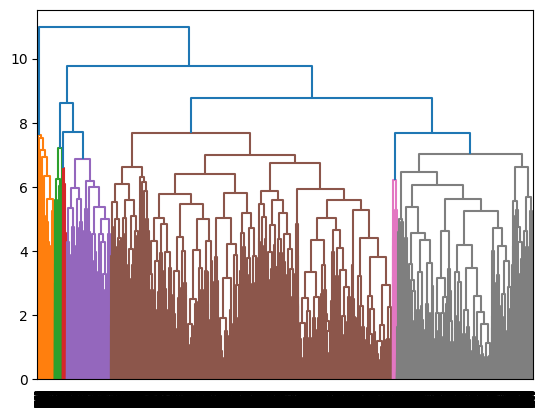

In [5]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

dendrogram(complete_clustering)

In [6]:
customer_data_encoded = pd.get_dummies(customer_data)

data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(customer_data_encoded)
scaled_data.shape

(9429, 35)

In [5]:
pca = PCA(n_components=10)

principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(principal_components)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.865738,-0.575384,-0.416529,-2.922618,0.799513,0.750957,0.146952,0.830692,0.406052,-1.518502
1,-1.345234,-0.629806,1.757170,-0.710255,1.199876,-0.397962,2.071607,-0.193935,1.475027,0.426988
2,-3.445802,-3.173999,3.098306,-0.287880,-1.656887,0.286520,-1.545741,0.520835,-1.462077,0.608530
3,1.434785,-0.242880,-0.296263,-0.289007,-1.412312,-1.675341,-0.495606,-2.104988,0.621257,-0.471086
4,0.824694,-1.297203,0.352246,-0.393243,-1.234272,-1.044809,1.389703,-0.379335,-2.607197,0.429013


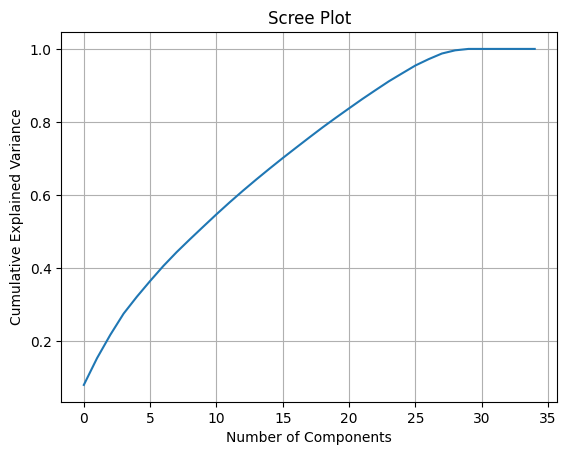

In [7]:
pca = PCA().fit(scaled_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

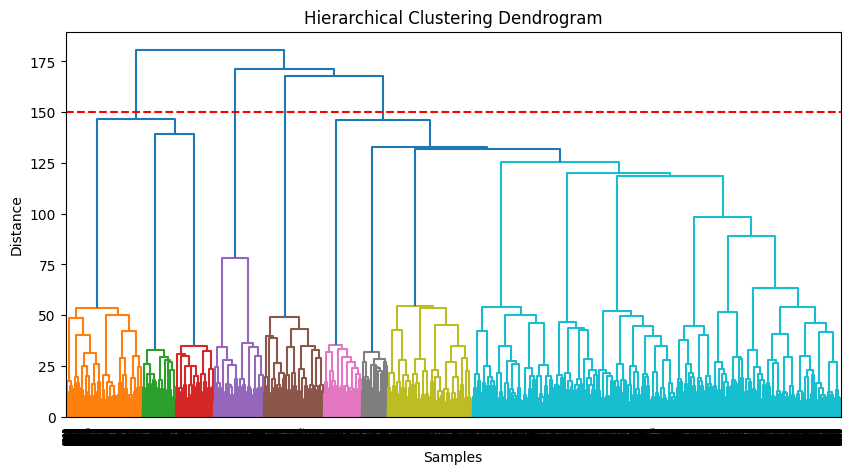

In [13]:
pca = PCA(n_components=25)  # Reduce to 25 dimensions
scaled_data_pca = pca.fit_transform(scaled_data)  # Transform data

# Compute hierarchical clustering
linkage_matrix = linkage(scaled_data_pca, method='ward')  # Ward's method for variance minimization

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.axhline(y=150, color='r', linestyle='--')  # Adjust threshold based on the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [14]:
# Assign cluster labels (decide number of clusters from dendrogram)
n_clusters = 4
cluster_labels = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit_predict(scaled_data_pca)

print(f"Cluster assignments: {np.unique(cluster_labels, return_counts=True)}")
cluster_labels

Cluster assignments: (array([0, 1, 2, 3], dtype=int64), array([1808, 6283,  604,  734], dtype=int64))


array([1, 1, 3, ..., 1, 3, 1], dtype=int64)

In [16]:
# Merge cluster labels with the customer dataset
customer_data_with_labels = customer_data
customer_data_with_labels['cluster'] = cluster_labels